In [ ]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From: https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
To: /content/dogs-vs-cats.zip
100%|██████████| 852M/852M [00:03<00:00, 275MB/s]


'dogs-vs-cats.zip'

In [ ]:
!unzip -qq dogs-vs-cats.zip

In [ ]:
!unzip -qq train.zip

In [ ]:
import os, shutil, pathlib

In [ ]:
og_dir=pathlib.Path("train")
new_dir=pathlib.Path("dogs_cats_small")

def make_subset(sub_n,st_idx,end_idx):
  for c in ("cat","dog"):
    dir = new_dir /sub_n/c
    os.makedirs(dir)
    f_ns=[f'{c}.{i}.jpg'for i in range(st_idx,end_idx)]
    for f_n in f_ns:
      shutil.copyfile(src=og_dir / f_n,dst= dir / f_n)
make_subset("train_data",0,1000)
make_subset("val_data",1000,1500)
make_subset("test_data",1500,2500)

In [ ]:
from keras.utils import image_dataset_from_directory
train_dataset=image_dataset_from_directory(new_dir/'train_data', batch_size=32, image_size=(180, 180))
test_dataset=image_dataset_from_directory(new_dir/'test_data', batch_size=32, image_size=(180, 180))
val_dataset=image_dataset_from_directory(new_dir/'val_data', batch_size=32, image_size=(180, 180))

Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Rescaling
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.optimizers import RMSprop,Adam, SGD

In [ ]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# 학습률 84

m = Sequential()
m.add(Rescaling(1./255, input_shape = (128, 128, 3)))
m.add(Conv2D(32, 3, activation = 'relu', padding = "same"))
m.add(Conv2D(32, 3, activation = 'relu', padding = "same"))
m.add(BatchNormalization())
m.add(MaxPooling2D((2)))
m.add(Dropout(0.25))

m.add(Conv2D(64, 3, activation = 'relu', padding = "same"))
m.add(Conv2D(64, 3, activation = 'relu', padding = "same"))
m.add(BatchNormalization())
m.add(MaxPooling2D((2)))
m.add(Dropout(0.4))

m.add(Conv2D(128, 3, activation = 'relu', padding = "same"))
m.add(Conv2D(128, 3, activation = 'relu', padding = "same"))
m.add(BatchNormalization())
m.add(MaxPooling2D((2)))
m.add(Dropout(0.5))

m.add(Flatten())
m.add(Dense(512, activation = 'relu'))
m.add(BatchNormalization())
m.add(Dropout(0.5))
m.add(Dense(1, activation = 'sigmoid'))
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0

In [ ]:
m.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = 'acc')

In [ ]:
hy = m.fit(train_dataset, validation_data = val_dataset, epochs = 50)

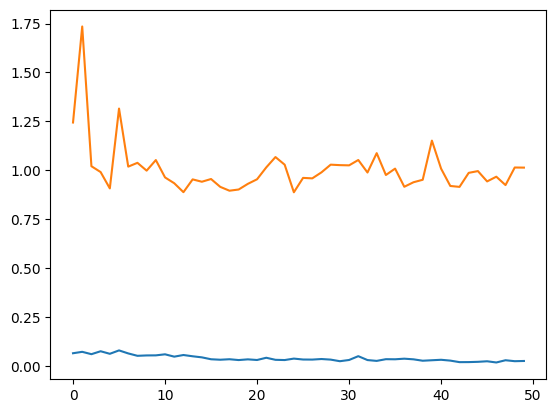

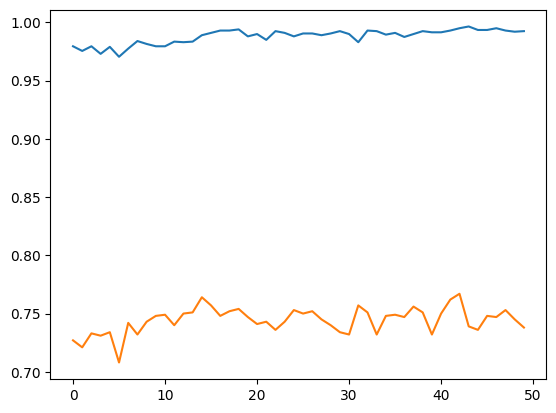

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()
plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])
plt.show()

In [ ]:
m.evaluate(test_dataset)

63/63 [==============================] - 2s 28ms/step - loss: 0.9880 - acc: 0.7540


[0.9879995584487915, 0.7540000081062317]

In [ ]:
m.evaluate(val_dataset)

32/32 [==============================] - 1s 26ms/step - loss: 1.0136 - acc: 0.7380


[1.0135565996170044, 0.7379999756813049]

In [ ]:
from keras.models import Sequential
from keras.layers import RandomFlip, RandomRotation, RandomZoom
data_add_m = Sequential([RandomFlip('horizontal'), RandomRotation(0.1), RandomZoom(0.2)])

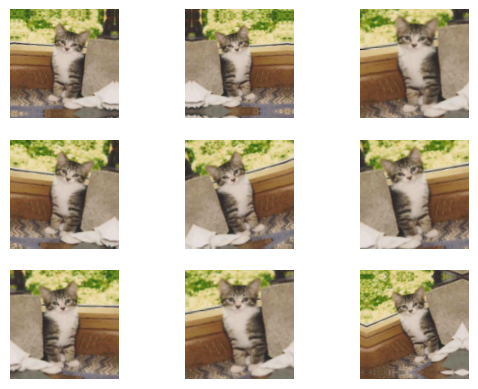

In [ ]:
import matplotlib.pyplot as plt
for img, _ in train_dataset.take(1):
    for i in range(9):
        data1 = data_add_m(img)
        ax = plt.subplot(3, 3, 1 + i)
        plt.imshow(data1[0].numpy().astype('uint8'))
        plt.axis("off")

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Rescaling, Flatten, MaxPooling2D
from keras.layers import Input
input = Input(shape = (180, 180, 3))
x = data_add_m(input)
m = Sequential()
m.add(Rescaling(1./255, input_shape = (180, 180, 3)))
m.add(Conv2D(32, 3, activation = "relu"))
m.add(MaxPooling2D(2))
m.add(Conv2D(64, 3, activation = "relu"))
m.add(MaxPooling2D(2))
m.add(Conv2D(128, 3, activation = "relu"))
m.add(MaxPooling2D(2))
m.add(Conv2D(256, 3, activation = "relu"))
m.add(MaxPooling2D(2))
m.add(Conv2D(256, 3, activation = "relu"))
m.add(MaxPooling2D(2))
m.add(Flatten())
m.add(Dense(1, activation = 'sigmoid'))
out_put = m(x)
all_m = Model(inputs = input, outputs = out_put)
all_m.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 sequential_2 (Sequential)   (None, 1)                 980801    
                                                                 
Total params: 980,801
Trainable params: 980,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = [ModelCheckpoint("b_m.h5",save_best_only=True,monitor="val_loss")]
all_m.compile(loss='binary_crossentropy',metrics='acc')
hy = all_m.fit(train_dataset,epochs=100,validation_data=val_dataset,callbacks=callbacks)

In [ ]:
from keras.models import load_model
l_m = load_model('b_m.h5')
l_m.evaluate(test_dataset)

63/63 [==============================] - 2s 33ms/step - loss: 0.4902 - acc: 0.7955


[0.4902378022670746, 0.7954999804496765]

In [ ]:
from keras.applications import VGG16
m = VGG16(include_top = False, weights = 'imagenet', input_shape = (180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
def prepro_vgg(dataset):
    all_x = []
    all_y = []
    for x, y in dataset:
        pre_x = vgg16.preprocess_input(x)
        s_x = m.redict(pre_x)

In [ ]:
from keras.datasets import cifar100
(train_x, train_y), (test_x, test_y) = cifar100.load_data()

169001437/169001437 [==============================] - 3s 0us/step


In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
import numpy as np
np.unique(train_y, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 5

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, BatchNormalization, RandomFlip, RandomZoom, RandomRotation, Flatten, Input
from keras.applications import VGG16, VGG19, MobileNet, Xception, ResNet50, InceptionV3

In [ ]:
data_add_m = Sequential(name = '데이터 증강 계층')
data_add_m.add(Input(shape = (32, 32, 3)))
data_add_m.add(RandomFlip("horizontal"))
data_add_m.add(RandomRotation(0.1))
data_add_m.add(RandomZoom(0.2))

In [ ]:
data_add_m.inputs, data_add_m.outputs

([<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'input_4')>],
 [<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'random_zoom_1')>])

In [ ]:
vgg_m = VGG16(include_top = False, input_shape = (32, 32, 3))
vgg_m.summary()

In [ ]:
vgg_m.inputs, vgg_m.outputs

([<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'input_3')>],
 [<KerasTensor: shape=(None, 1, 1, 512) dtype=float32 (created by layer 'block5_pool')>])

In [ ]:
f_m = Sequential()
f_m.add(Flatten(input_shape = (1, 1, 512)))
f_m.add(Dense(256))
f_m.add(Dropout(0.5))
f_m.add(Dense(100, activation = "softmax"))

In [ ]:
f_m.inputs, f_m.outputs

([<KerasTensor: shape=(None, 1, 1, 512) dtype=float32 (created by layer 'flatten_2_input')>],
 [<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_5')>])

In [ ]:
#m = Sequential()
#m.add(data_add_m)
#m.add(vgg_m)
#m.add(f_m)
x = vgg_m(data_add_m.output)
out = f_m(x)
m = Model(inputs = data_add_m.inputs, outputs = out)
m.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_rotation_1 (RandomRo  (None, 32, 32, 3)        0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 32, 32, 3)         0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 sequential_5 (Sequential)   (None, 100)               157028    
                                                           

In [ ]:
m.layers[4].trainable = False

In [ ]:
for l in m.layers:
    print(l.trainable)

True
True
True
True
False
True


In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
from keras.datasets import cifar10
(x_data,y_data),(test_x, test_y) = cifar10.load_data()

In [ ]:
x_data.shape, y_data.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,BatchNormalization,RandomFlip,RandomZoom,RandomRotation,Flatten,Input, Rescaling
from keras.applications import VGG16,VGG19,MobileNet,Xception,ResNet50,InceptionV3
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42, stratify = y_data)

In [ ]:
train_x.shape, test_x.shape, val_x.shape, train_y.shape, test_y.shape, val_y.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 1),
 (10000, 1),
 (10000, 1))

Q1 데이터 증강기와 사전 학습된 특징 검출기를 이용하여 데이터 분류기를 완성하고 성능을 올리시오.

In [ ]:
data_add_m = Sequential()
data_add_m.add(Input(shape = (32, 32, 3)))
data_add_m.add(Rescaling(1./255))

data_add_m.add(RandomFlip("horizontal"))
data_add_m.add(RandomRotation(0.1))
data_add_m.add(RandomZoom(0.2))

data_add_m.add(VGG16(include_top = False))

data_add_m.add(Flatten(input_shape = (1, 1, 512)))
data_add_m.add(Dense(10, activation = "softmax"))
data_add_m.layers[4].trainable = False
data_add_m.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 random_flip_5 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_rotation_5 (RandomRo  (None, 32, 32, 3)        0         
 tation)                                                         
                                                                 
 random_zoom_5 (RandomZoom)  (None, 32, 32, 3)         0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_6 (Flatten)         (None, 512)               0         
                                                      

In [ ]:
callbacks = [ModelCheckpoint("vgg19_m.h5", save_best_only = True, monitor = "val_loss"),
             EarlyStopping(patience = 10)]
data_add_m.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'acc')
hy1 = data_add_m.fit(train_x, train_y, validation_data = (val_x, val_y), callbacks = callbacks, epochs = 30)

Epoch 1/30
1250/1250 [==============================] - 697s 556ms/step - loss: 1.7115 - acc: 0.4044 - val_loss: 1.4665 - val_acc: 0.4998
Epoch 2/30
1250/1250 [==============================] - 784s 627ms/step - loss: 1.5103 - acc: 0.4772 - val_loss: 1.3848 - val_acc: 0.5174
Epoch 3/30
1250/1250 [==============================] - 713s 570ms/step - loss: 1.4587 - acc: 0.4934 - val_loss: 1.3350 - val_acc: 0.5379
Epoch 4/30
 921/1250 [=====================>........] - ETA: 2:30 - loss: 1.4213 - acc: 0.5057

KeyboardInterrupt: ignored

Q2 데이터 증강기와 사전 학습된 모델을 미세튜닝하여 데이터 분류기를 완성하고 성능을 올리시오

tf데이터

In [ ]:
import tensorflow_datasets as tfds
dataset, m = tfds.load('tf_flowers', split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'], as_supervised=True, with_info=True)
train_dataset, val_dataset, test_dataset = dataset

In [ ]:
from keras.layers import RandomFlip
from keras.models import Sequential

In [ ]:
m = Sequential()
m.add(RandomFlip('horizontal_and_vertical'))

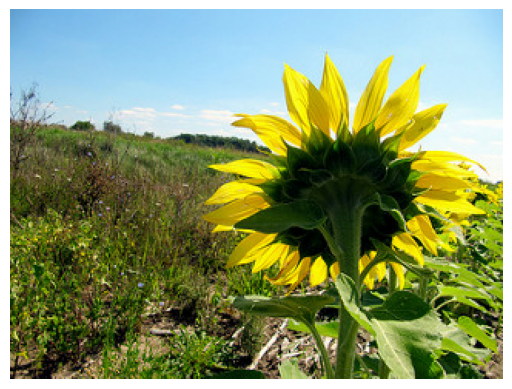

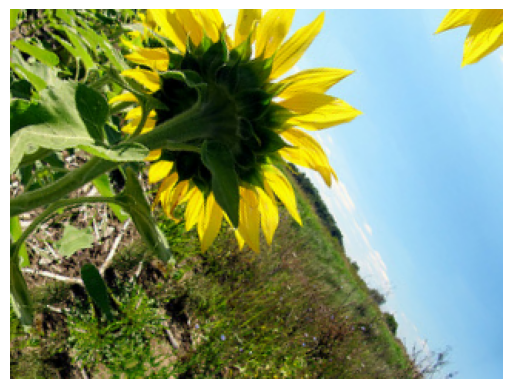

In [ ]:
from keras.models import Sequential
from keras.layers import RandomFlip, RandomRotation, RandomZoom
data_add_m = Sequential([RandomFlip('horizontal_and_vertical'), RandomRotation(0.5)])
import matplotlib.pyplot as plt
c = 0
for img, _ in train_dataset:
    c += 1
    if c < 3:
        continue
    plt.imshow(img.numpy().astype('uint8'))
    plt.axis('off')
    plt.show()
    for i in range(1):
        data1 = data_add_m(img)
        plt.imshow(data1.numpy().astype('uint8'))
        plt.axis('off')
        plt.show()
    break

In [ ]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
(_,_), (x, y) = fashion_mnist.load_data()
x_data, test_x, y_data, test_y = train_test_split(x, y)
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data)

In [ ]:
train_x = train_x.reshape(-1,28, 28, 1)

In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
m=Sequential()
m.add(Conv2D(3,3,padding='same',input_shape=train_x.shape[1:]))
m.add(MaxPooling2D(2))
m.add(Conv2D(6,3,padding='same'))
m.add(MaxPooling2D(2))
m.add(Flatten())
m.add(Dense(10,activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',metrics='acc')

In [ ]:
m.layers

In [ ]:
m.layers[0].weights[0].shape

TensorShape([3, 3, 1, 3])

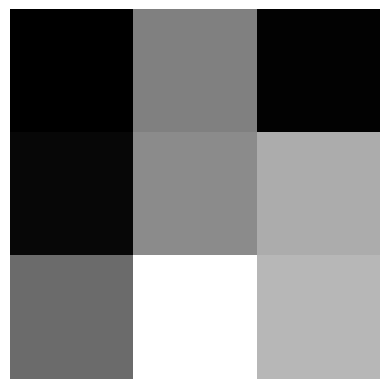

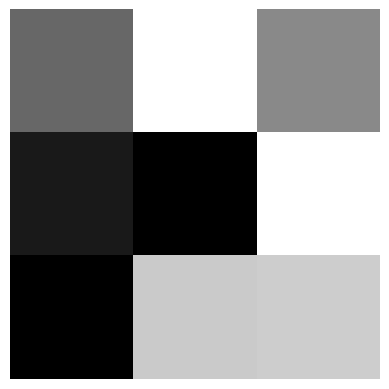

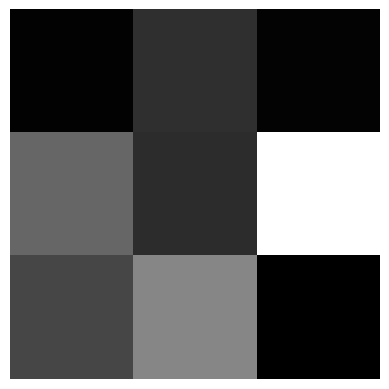

In [ ]:
for i in range(3):
  plt.imshow(m.layers[0].weights[0].numpy()[:,:,:,i], cmap = 'gray')
  plt.axis("off")
  plt.show()

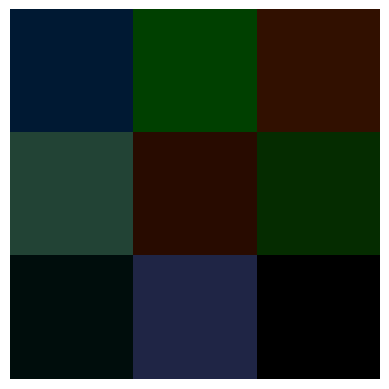

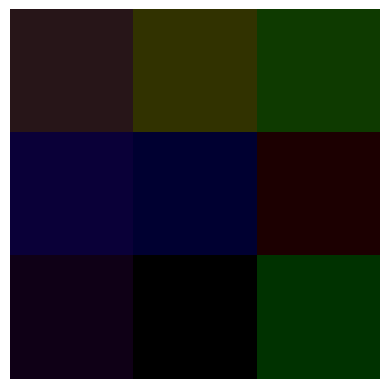

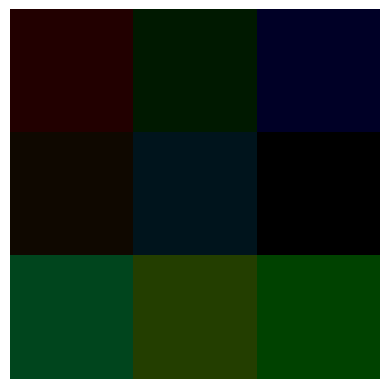

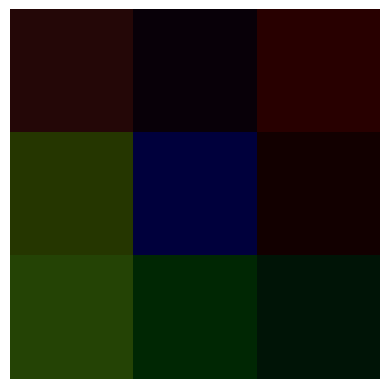

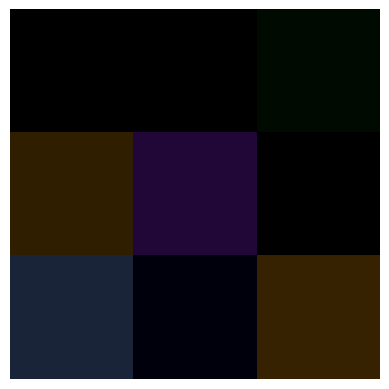

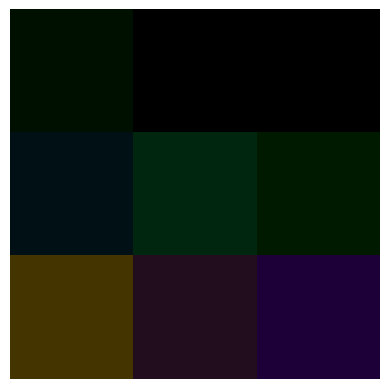

In [ ]:
for i in range(6):
  plt.imshow(m.layers[2].weights[0].numpy()[:,:,:,i])
  plt.axis("off")
  plt.show()

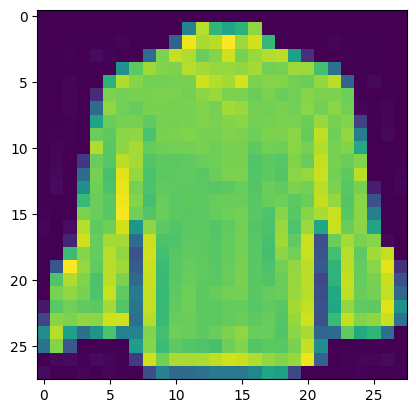

In [ ]:
plt.imshow(train_x[2])

In [ ]:
from keras.models import Model
c1_ck_m = Model(m.input, m.layers[0].output)
c2_ck_m = Model(m.input, m.layers[2].output)

In [ ]:
out_im1 = c1_ck_m.predict(train_x[2:3])
out_im2 = c2_ck_m.predict(train_x[2:3])

1/1 [==============================] - 0s 104ms/step


In [ ]:
out_im1.shape

(1, 28, 28, 3)

In [ ]:
ck_1 = out_im1.reshape(28, 28, 3)
ck_2 = out_im2.reshape(14, 14, 6)

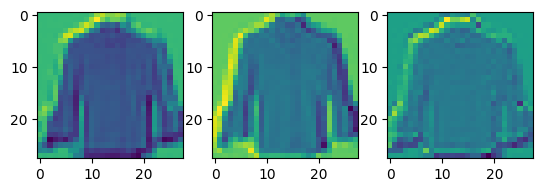

In [ ]:
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(ck_1[:, :, i])

In [1]:
import sys
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
